In [3]:
import sympy as sy

In [2]:
t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km = sy.symbols("t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km")
P, Pm, Pa, Pu, M, E, Em, Ea, Eu = sy.symbols("P, Pm, Pa, Pu, M, E, Em, Ea, Eu")

raw_sol = sy.Matrix([[-(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - p + j*(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - p)/a)/(h*(M/w + Me))], 
                     [-(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - p)/a], 
                     [-(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - p)/u], 
                     [(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - p)/(-b - Ap*n/Ae)], 
                     [(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))], 
                     [(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)], 
                     [-(-Ap*M**2*a**2*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)**2*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*M*a*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)))/u], 
                     [Ap*M*a*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d))]])

for i in range(8):
    print(f"{i}: {raw_sol[i]}")

0: (Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) - Ap*M*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))))/(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j) - Ap*M*a*b*h*n*p/(Ae*w*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)) - b - d)) + Ap*n*p/(Ae*(-b - Ap*n/Ae)))/(Ap*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) + p - j*(-Ae*f*(-j*(Ap*M**2*a*b*h**2*n*p/(Ae*w**2*(-b - Ap*n/Ae)*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))**2*(-M*h*j/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))) - a - j)*(M*a*b*h/(w*(-Ae*f/Ap - M*h/w - f*n/(-b - Ap*n/Ae))*(-M*h*j/(w*(-Ae*f

In [3]:
## solving for P
sol_0 = raw_sol[0]

simplified_0 = sy.cse(sol_0, optimizations='basic')
print(simplified_0)

x0 = M/w
x1 = sy.simplify(h*x0)
x2 = sy.simplify(f*n/(b + Ap*n/Ae))
x3 = sy.simplify(Ae*f/Ap + x1 - x2)
x4 = sy.simplify(-x1/x3)
x5 = sy.simplify(j*x4)
x6 = sy.simplify(1/(a + j + x5))
x7 = sy.simplify(a*b*x6)
x8 = sy.simplify(x4*x7)
x9 = sy.simplify(1/(b + d + x8))
x10 = sy.simplify(1/x3)
x11 = sy.simplify(x1*x10)
x12 = sy.simplify(x11*x7*x9 + 1)
x13 = sy.simplify(x10*x2)
x14 = sy.simplify(x8*x9 - 1)

sol0 = sy.simplify(p*(x13*(j*x11*x12*x6 + x12) + 1 + j*(x13*(x14*x5*x6 - x14) + 1)/a)/(h*(Me + x0)))
print(sol0)


([(x0, M/w), (x1, h*x0), (x2, f*n/(b + Ap*n/Ae)), (x3, Ae*f/Ap + x1 - x2), (x4, -x1/x3), (x5, j*x4), (x6, 1/(a + j + x5)), (x7, a*b*x6), (x8, x4*x7), (x9, 1/(b + d + x8)), (x10, 1/x3), (x11, x1*x10), (x12, x11*x7*x9 + 1), (x13, x10*x2), (x14, x8*x9 - 1)], [p*(x13*(j*x11*x12*x6 + x12) + 1 + j*(x13*(x14*x5*x6 - x14) + 1)/a)/(h*(Me + x0))])
p*w*(-Ae*Ap*a*f*n*w*(b + d)*(Ae**2*a*b*f*w + Ae**2*b*f*j*w + Ae*Ap*M*a*b*h + Ap**2*M*a*h*n + Ap*M*h*j*(Ae*b + Ap*n)) + a*(Ap*M*a*b*h*(Ae*b + Ap*n) - (b + d)*(Ae**2*a*b*f*w + Ae**2*b*f*j*w + Ae*Ap*M*a*b*h + Ap**2*M*a*h*n))*(Ae**2*b*f*w + Ae*Ap*M*b*h + Ap**2*M*h*n) - j*(Ae*Ap*f*n*w*(b + d)*(Ae**2*a*b*f*w + Ae**2*b*f*j*w + Ae*Ap*M*a*b*h + Ap**2*M*a*h*n + Ap*M*h*j*(Ae*b + Ap*n)) - (Ap*M*a*b*h*(Ae*b + Ap*n) - (b + d)*(Ae**2*a*b*f*w + Ae**2*b*f*j*w + Ae*Ap*M*a*b*h + Ap**2*M*a*h*n))*(Ae**2*b*f*w + Ae*Ap*M*b*h + Ap**2*M*h*n)))/(a*h*(M + Me*w)*(Ap*M*a*b*h*(Ae*b + Ap*n) - (b + d)*(Ae**2*a*b*f*w + Ae**2*b*f*j*w + Ae*Ap*M*a*b*h + Ap**2*M*a*h*n))*(Ae**2*b*f*w + Ae*

In [4]:
## Pm computed in terminal

Pm = p*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))

In [5]:
print(sy.factor(sol0))

p*w*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*h*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))


In [6]:
## solving for Pa
sol_2 = raw_sol[2]

simplified_2 = sy.cse(sol_2, optimizations='basic')
print(simplified_2)

x0 = M*h/w
x1 = f*n/(b+Ap*n/Ae)
x2 = sy.simplify(Ae*f/Ap + x0 - x1)
x3 = sy.simplify(1/x2)
x4 = sy.simplify(-x0/x2)
x5 = sy.simplify(1/(a + j*x4 + j))
x6 = sy.simplify(a*b*x5)
x7 = sy.simplify(x0*x3)
x8 = sy.simplify(x6*x7/(b + d + x4*x6) + 1)

sol2 = sy.simplify(p*(x1*x3*(j*x5*x7*x8 + x8) + 1)/u)
print(sol2)
print(sy.factor(sol2))

([(x0, M*h/w), (x1, f*n/(b + Ap*n/Ae)), (x2, Ae*f/Ap + x0 - x1), (x3, 1/x2), (x4, -x0/x2), (x5, 1/(a + j*x4 + j)), (x6, a*b*x5), (x7, x0*x3), (x8, x6*x7/(b + d + x4*x6) + 1)], [p*(x1*x3*(j*x5*x7*x8 + x8) + 1)/u])
p*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ae*Ap*a*b*f*n*w + Ae*Ap*a*d*f*n*w + Ae*Ap*b*f*j*n*w + Ae*Ap*d*f*j*n*w + Ap**2*M*a*d*h*n)/(u*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))
p*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(u*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))


In [7]:
## simplifying Pu
sol_3 = raw_sol[3]

simplified_3 = sy.cse(sol_3, optimizations='basic')
print(simplified_3)

x0 = 1/(b + Ap*n/Ae)
x1 = M*h/w
x2 = sy.simplify(f*n*x0)
x3 = sy.simplify(Ae*f/Ap + x1 - x2)
x4 = sy.simplify(-x1/x3)
x5 = sy.simplify(j*x4)
x6 = sy.simplify(1/(a + j + x5))
x7 = sy.simplify(a*b*x4*x6)
x8 = sy.simplify(x7/(b + d + x7) - 1)

sol3 = sy.simplify(p*x0*(x2*(x5*x6*x8 - x8)/x3 + 1))
print(sol3)
print(sy.factor(sol3))

([(x0, 1/(b + Ap*n/Ae)), (x1, M*h/w), (x2, f*n*x0), (x3, Ae*f/Ap + x1 - x2), (x4, -x1/x3), (x5, j*x4), (x6, 1/(a + j + x5)), (x7, a*b*x4*x6), (x8, x7/(b + d + x7) - 1)], [p*x0*(x2*(x5*x6*x8 - x8)/x3 + 1)])
Ae*p*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)
Ae*p*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)


In [8]:
## simplifying E
sol_4 = raw_sol[4]

simplified_4 = sy.cse(sol_4, optimizations='basic')
print(simplified_4)

x0 = Ap*n/Ae
x1 = sy.simplify(1/(b + x0))
x2 = M*h/w
x3 = sy.simplify(Ae*f/Ap - f*n*x1 + x2)
x4 = sy.simplify(1/x3)
x5 = sy.simplify(-x2/x3)
x6 = sy.simplify(1/(a + j*x5 + j))
x7 = sy.simplify(a*b*x6)
x8 = sy.simplify(x2*x4)
x9 = sy.simplify(x7*x8/(b + d + x5*x7) + 1)

sol4 = sy.simplify(p*x0*x1*x4*(j*x6*x8*x9 + x9))
print(sol4)
print(sy.factor(sol4))

([(x0, Ap*n/Ae), (x1, 1/(b + x0)), (x2, M*h/w), (x3, Ae*f/Ap - f*n*x1 + x2), (x4, 1/x3), (x5, -x2/x3), (x6, 1/(a + j*x5 + j)), (x7, a*b*x6), (x8, x2*x4), (x9, x7*x8/(b + d + x5*x7) + 1)], [p*x0*x1*x4*(j*x6*x8*x9 + x9)])
Ap**2*n*p*w*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)
Ap**2*n*p*w*(a + j)*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)


In [9]:
## simplifying Em
sol_5 = raw_sol[5]

simplified_5 = sy.cse(sol_5, optimizations='basic')
print(simplified_5)

x0 = Ap*n/Ae
x1 = sy.simplify(1/(b + x0))
x2 = M*h/w
x3 = sy.simplify(Ae*f/Ap - f*n*x1 + x2)
x4 = sy.simplify(1/x3)
x5 = sy.simplify(j*x2)
x6 = a + j
x7 = sy.simplify(-1/x3)
x8 = sy.simplify(a*b*x2/(x5*x7 + x6))

sol5 = sy.simplify(p*x0*x1*x2*x4*(x4*x8/(b + d + x7*x8) + 1)/(-x4*x5 + x6))
print(sol5)
print(sy.factor(sol5))

([(x0, Ap*n/Ae), (x1, 1/(b + x0)), (x2, M*h/w), (x3, Ae*f/Ap - f*n*x1 + x2), (x4, 1/x3), (x5, j*x2), (x6, a + j), (x7, -1/x3), (x8, a*b*x2/(x5*x7 + x6))], [p*x0*x1*x2*x4*(x4*x8/(b + d + x7*x8) + 1)/(-x4*x5 + x6)])
Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)
Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)


In [10]:
## simplifying Ea
sol_6 = raw_sol[6]

simplified_6 = sy.cse(sol_6, optimizations='basic')
print(simplified_6)

x0 = Ap*n/Ae
x1 = sy.simplify(1/(b + x0))
x2 = M*h/w
x3 = sy.simplify(Ae*f/Ap - f*n*x1 + x2)
x4 = sy.simplify(1/x3)
x5 = sy.simplify(j*x2)
x6 = a + j
x7 = sy.simplify(1/(-x4*x5 + x6))
x8 = sy.simplify(a*x2*x4)
x9 = b*x8

sol6 = sy.simplify(p*x0*x1*x7*x8*(x7*x9/(b + d - x9/(x6 - x5/x3)) + 1)/u)
print(sol6)
print(sy.factor(sol6))

([(x0, Ap*n/Ae), (x1, 1/(b + x0)), (x2, M*h/w), (x3, Ae*f/Ap - f*n*x1 + x2), (x4, 1/x3), (x5, j*x2), (x6, a + j), (x7, 1/(-x4*x5 + x6)), (x8, a*x2*x4), (x9, b*x8)], [p*x0*x1*x7*x8*(x7*x9/(b + d - x9/(x6 - x5/x3)) + 1)/u])
Ap**2*M*a*h*n*p*(b + d)/(u*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))
Ap**2*M*a*h*n*p*(b + d)/(u*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))


In [11]:
## simplifying Eu
sol_7 = raw_sol[7]

simplified_7 = sy.cse(sol_7, optimizations='basic')
print(simplified_7)

x0 = Ap*n/Ae
x1 = sy.simplify(1/(b + x0))
x2 = M*h/w
x3 = sy.simplify(Ae*f/Ap - f*n*x1 + x2)
x4 = sy.simplify(1/x3)
x5 = sy.simplify(j*x2)
x6 = a + j
x7 = sy.simplify(a*x2*x4)

sol7 = sy.simplify(p*x0*x1*x7/((-x4*x5 + x6)*(-b*x7/(x6 - x5/x3) + b + d)))
print(sol7)
print(sy.factor(sol7))

([(x0, Ap*n/Ae), (x1, 1/(b + x0)), (x2, M*h/w), (x3, Ae*f/Ap - f*n*x1 + x2), (x4, 1/x3), (x5, j*x2), (x6, a + j), (x7, a*x2*x4)], [p*x0*x1*x7/((-x4*x5 + x6)*(-b*x7/(x6 - x5/x3) + b + d))])
Ap**2*M*a*h*n*p/(-Ap*M*a*b*h*(Ae*b + Ap*n) + (b + d)*(-Ap*M*h*j*(Ae*b + Ap*n) + (a + j)*(Ae**2*b*f*w + Ae*Ap*M*b*h + Ap**2*M*h*n)))
Ap**2*M*a*h*n*p/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)


In [4]:
# set up sympy variables
t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km = sy.symbols("t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km")
P, Pm, Pa, Pu, M, E, Em, Ea, Eu = sy.symbols("P, Pm, Pa, Pu, M, E, Em, Ea, Eu")

In [13]:
### A SLIGHTLY DIFFERENT METHOD ###

# steady states and remaining equations
steady_states = {E: (Ae*Ap*Ea*a*b**2*u*w + Ae*Ap*Ea*b**2*j*u*w + Ap**2*Ea*a*b*n*u*w + Ap**2*Ea*b*j*n*u*w + Ap**2*Pa*a*b*n*u*w + Ap**2*Pa*a*d*n*u*w + Ap**2*Pa*b*j*n*u*w + Ap**2*Pa*d*j*n*u*w)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b**2*h + Ae*Ap*M*a*b*d*h + Ae*Ap*a*b*f*n*w + Ae*Ap*a*d*f*n*w + Ae*Ap*b*f*j*n*w + Ae*Ap*d*f*j*n*w + Ap**2*M*a*b*h*n + Ap**2*M*a*d*h*n), 
                    Em: (Ae*Ap*Ea*M*b**2*h*u + Ap**2*Ea*M*b*h*n*u + Ap**2*M*Pa*b*h*n*u + Ap**2*M*Pa*d*h*n*u)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b**2*h + Ae*Ap*M*a*b*d*h + Ae*Ap*a*b*f*n*w + Ae*Ap*a*d*f*n*w + Ae*Ap*b*f*j*n*w + Ae*Ap*d*f*j*n*w + Ap**2*M*a*b*h*n + Ap**2*M*a*d*h*n), 
                    Eu: Ea*u/(b + d), 
                    P: (Ae**2*Ea*a**2*b**2*f*u*w**2 + 2*Ae**2*Ea*a*b**2*f*j*u*w**2 + Ae**2*Ea*b**2*f*j**2*u*w**2 + Ae**2*a**2*b**2*f*p*w**2 + Ae**2*a**2*b*d*f*p*w**2 + 2*Ae**2*a*b**2*f*j*p*w**2 + 2*Ae**2*a*b*d*f*j*p*w**2 + Ae**2*b**2*f*j**2*p*w**2 + Ae**2*b*d*f*j**2*p*w**2 + Ae*Ap*Ea*a**2*b*f*n*u*w**2 + 2*Ae*Ap*Ea*a*b*f*j*n*u*w**2 + Ae*Ap*Ea*b*f*j**2*n*u*w**2 + Ae*Ap*M*a**2*b**2*h*p*w + Ae*Ap*M*a**2*b*d*h*p*w + Ae*Ap*M*a*b**2*h*j*p*w + Ae*Ap*M*a*b*d*h*j*p*w + Ae*Ap*Pa*a**2*b*f*n*u*w**2 + Ae*Ap*Pa*a**2*d*f*n*u*w**2 + 2*Ae*Ap*Pa*a*b*f*j*n*u*w**2 + 2*Ae*Ap*Pa*a*d*f*j*n*u*w**2 + Ae*Ap*Pa*b*f*j**2*n*u*w**2 + Ae*Ap*Pa*d*f*j**2*n*u*w**2 + Ae*Ap*a**2*b*f*n*p*w**2 + Ae*Ap*a**2*d*f*n*p*w**2 + 2*Ae*Ap*a*b*f*j*n*p*w**2 + 2*Ae*Ap*a*d*f*j*n*p*w**2 + Ae*Ap*b*f*j**2*n*p*w**2 + Ae*Ap*d*f*j**2*n*p*w**2 + Ap**2*M*a**2*b*h*n*p*w + Ap**2*M*a**2*d*h*n*p*w + Ap**2*M*a*b*h*j*n*p*w + Ap**2*M*a*d*h*j*n*p*w)/(Ae**2*M*a**2*b**2*f*h*w + Ae**2*M*a**2*b*d*f*h*w + Ae**2*M*a*b**2*f*h*j*w + Ae**2*M*a*b*d*f*h*j*w + Ae**2*Me*a**2*b**2*f*h*w**2 + Ae**2*Me*a**2*b*d*f*h*w**2 + Ae**2*Me*a*b**2*f*h*j*w**2 + Ae**2*Me*a*b*d*f*h*j*w**2 + Ae*Ap*M**2*a**2*b**2*h**2 + Ae*Ap*M**2*a**2*b*d*h**2 + Ae*Ap*M*Me*a**2*b**2*h**2*w + Ae*Ap*M*Me*a**2*b*d*h**2*w + Ae*Ap*M*a**2*b*f*h*n*w + Ae*Ap*M*a**2*d*f*h*n*w + Ae*Ap*M*a*b*f*h*j*n*w + Ae*Ap*M*a*d*f*h*j*n*w + Ae*Ap*Me*a**2*b*f*h*n*w**2 + Ae*Ap*Me*a**2*d*f*h*n*w**2 + Ae*Ap*Me*a*b*f*h*j*n*w**2 + Ae*Ap*Me*a*d*f*h*j*n*w**2 + Ap**2*M**2*a**2*b*h**2*n + Ap**2*M**2*a**2*d*h**2*n + Ap**2*M*Me*a**2*b*h**2*n*w + Ap**2*M*Me*a**2*d*h**2*n*w), 
                    Pm: (Ae**2*Ea*a*b**2*f*u*w + Ae**2*Ea*b**2*f*j*u*w + Ae**2*a*b**2*f*p*w + Ae**2*a*b*d*f*p*w + Ae**2*b**2*f*j*p*w + Ae**2*b*d*f*j*p*w + Ae*Ap*Ea*a*b*f*n*u*w + Ae*Ap*Ea*b*f*j*n*u*w + Ae*Ap*M*a*b**2*h*p + Ae*Ap*M*a*b*d*h*p + Ae*Ap*Pa*a*b*f*n*u*w + Ae*Ap*Pa*a*d*f*n*u*w + Ae*Ap*Pa*b*f*j*n*u*w + Ae*Ap*Pa*d*f*j*n*u*w + Ae*Ap*a*b*f*n*p*w + Ae*Ap*a*d*f*n*p*w + Ae*Ap*b*f*j*n*p*w + Ae*Ap*d*f*j*n*p*w + Ap**2*M*a*b*h*n*p + Ap**2*M*a*d*h*n*p)/(Ae**2*a**2*b**2*f*w + Ae**2*a**2*b*d*f*w + Ae**2*a*b**2*f*j*w + Ae**2*a*b*d*f*j*w + Ae*Ap*M*a**2*b**2*h + Ae*Ap*M*a**2*b*d*h + Ae*Ap*a**2*b*f*n*w + Ae*Ap*a**2*d*f*n*w + Ae*Ap*a*b*f*j*n*w + Ae*Ap*a*d*f*j*n*w + Ap**2*M*a**2*b*h*n + Ap**2*M*a**2*d*h*n), 
                    Pu: Ae*Pa*u/(Ae*b + Ap*n)}
dPa = a*Pm - u*Pa
dEa = a*Em - u*Ea 
print("initialized variables")

# substitute
dPa = sy.simplify(dPa.subs(Pm, steady_states[Pm]))
dEa = sy.simplify(dEa.subs(Em, steady_states[Em]))
print("substitution complete")

sol = sy.solve([dPa, dEa], [Pa, Ea])
print(sol)

initialized variables
substitution complete
{Ea: (Ap**2*M*a*b*h*n*p + Ap**2*M*a*d*h*n*p)/(Ae**2*a*b**2*f*u*w + Ae**2*a*b*d*f*u*w + Ae**2*b**2*f*j*u*w + Ae**2*b*d*f*j*u*w + Ae*Ap*M*a*b*d*h*u + Ap**2*M*a*d*h*n*u), Pa: (Ae**2*a*b**2*f*p*w + Ae**2*a*b*d*f*p*w + Ae**2*b**2*f*j*p*w + Ae**2*b*d*f*j*p*w + Ae*Ap*M*a*b*d*h*p + Ae*Ap*a*b*f*n*p*w + Ae*Ap*a*d*f*n*p*w + Ae*Ap*b*f*j*n*p*w + Ae*Ap*d*f*j*n*p*w + Ap**2*M*a*d*h*n*p)/(Ae**2*a*b**2*f*u*w + Ae**2*a*b*d*f*u*w + Ae**2*b**2*f*j*u*w + Ae**2*b*d*f*j*u*w + Ae*Ap*M*a*b*d*h*u + Ap**2*M*a*d*h*n*u)}


In [14]:
E = sy.simplify(steady_states[E].subs(Ea, sol[Ea]))
sy.simplify(E.subs(Pa, sol[Pa]))

Ap**2*n*p*w*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)

In [15]:
Em = sy.simplify(steady_states[Em].subs(Ea, sol[Ea]))
sy.simplify(Em.subs(Pa, sol[Pa]))

Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)

In [16]:
Eu = sy.simplify(steady_states[Eu].subs(Ea, sol[Ea]))
sy.simplify(Eu.subs(Pa, sol[Pa]))

Ap**2*M*a*h*n*p/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)

In [17]:
P = sy.simplify(steady_states[P].subs(Ea, sol[Ea]))
sy.factor(sy.simplify(P.subs(Pa, sol[Pa])))

p*w*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*h*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))

In [18]:
Pm = sy.simplify(steady_states[Pm].subs(Ea, sol[Ea]))
sy.factor(sy.simplify(Pm.subs(Pa, sol[Pa])))

p*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))

In [19]:
Pu = sy.simplify(steady_states[Pu].subs(Ea, sol[Ea]))
sy.factor(sy.simplify(Pu.subs(Pa, sol[Pa])))

Ae*p*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)

In [5]:
# substitution into M to get equation for bisection method
# steady states computed previously
steady_states = {E: Ap**2*n*p*w*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n),
                    Em: Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n),
                    Ea: (Ap**2*M*a*b*h*n*p + Ap**2*M*a*d*h*n*p)/(Ae**2*a*b**2*f*u*w + Ae**2*a*b*d*f*u*w + Ae**2*b**2*f*j*u*w + Ae**2*b*d*f*j*u*w + Ae*Ap*M*a*b*d*h*u + Ap**2*M*a*d*h*n*u), 
                    Eu: Ap**2*M*a*h*n*p/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n),
                    P: p*w*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*h*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)),
                    Pm: p*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)),
                    Pa: (Ae**2*a*b**2*f*p*w + Ae**2*a*b*d*f*p*w + Ae**2*b**2*f*j*p*w + Ae**2*b*d*f*j*p*w + Ae*Ap*M*a*b*d*h*p + Ae*Ap*a*b*f*n*p*w + Ae*Ap*a*d*f*n*p*w + Ae*Ap*b*f*j*n*p*w + Ae*Ap*d*f*j*n*p*w + Ap**2*M*a*d*h*n*p)/(Ae**2*a*b**2*f*u*w + Ae**2*a*b*d*f*u*w + Ae**2*b**2*f*j*u*w + Ae**2*b*d*f*j*u*w + Ae*Ap*M*a*b*d*h*u + Ap**2*M*a*d*h*n*u),
                    Pu: Ae*p*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)}

# substitutions
dM = -(h/w)*M*P - (h/w)*E*M + (j + u)*(Em + Pm) - vmax*M/(V*(Km + M))
print(dM)
new_m1 = dM.subs(E, steady_states[E])
print(f"computed new_m1: {new_m1}")
new_m2 = new_m1.subs(Em, steady_states[Em])
print(f"computed new_m2: {new_m2}")
new_m3 = new_m2.subs(P, steady_states[P])
print(f"computed new_m3: {new_m3}")
new_m4 = new_m3.subs(Pm, steady_states[Pm])
print(f"computed new_m4: {new_m4}")
new_m5 = new_m4.subs(Pa, steady_states[Pa])
print(new_m5)
new_m5


-E*M*h/w - M*P*h/w - M*vmax/(V*(Km + M)) + (Em + Pm)*(j + u)
computed new_m1: -Ap**2*M*h*n*p*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) - M*P*h/w - M*vmax/(V*(Km + M)) + (Em + Pm)*(j + u)
computed new_m2: -Ap**2*M*h*n*p*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) - M*P*h/w - M*vmax/(V*(Km + M)) + (j + u)*(Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) + Pm)
computed new_m3: -Ap**2*M*h*n*p*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) - M*p*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*

-Ap**2*M*h*n*p*(a*b + a*d + b*j + d*j)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) - M*p*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)) - M*vmax/(V*(Km + M)) + (j + u)*(Ap**2*M*h*n*p*(b + d)/(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) + p*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)/(a*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n)))

In [6]:
## simplifying M
M1 = new_m4

simplifier = sy.cse(M1, optimizations='basic')
print(simplifier)

# Generate the code:
for name, expr in simplifier[0]:
    # If expr refers to another x-variable, wrap in simplify
    expr_str = expr if isinstance(expr, str) else sy.srepr(expr)
    need_simp = 'x' in expr_str
    if need_simp:
        print(f"{name} = sy.simplify({expr})")
    else:
        print(f"{name} = {expr}")

# sol7 = sy.simplify(p*x0*x1*x7/((-x4*x5 + x6)*(-b*x7/(x6 - x5/x3) + b + d)))
# print(sol7)
# print(sy.factor(sol7))

([(x0, a*b), (x1, a*d), (x2, b*j), (x3, d*j), (x4, Ae*b), (x5, M*h), (x6, x1*x5), (x7, Ap*x6), (x8, Ae**2), (x9, f*w), (x10, d*x8*x9), (x11, Ap**2*n), (x12, a*x9), (x13, b**2*x8), (x14, j*x9), (x15, 1/(x0*x10 + x10*x2 + x11*x6 + x12*x13 + x13*x14 + x4*x7)), (x16, p*x15), (x17, x11*x5), (x18, Ae*x9), (x19, (Ap*n + x4)*(x1*x18 + x12*x4 + x14*x4 + x18*x3 + x7)/a)], [-M*x16*x19*(a + j)/(M + Me*w) - M*vmax/(V*(Km + M)) + p*x15*(j + u)*(x17*(b + d) + x19) - x16*x17*(x0 + x1 + x2 + x3)])
x0 = a*b
x1 = a*d
x2 = b*j
x3 = d*j
x4 = Ae*b
x5 = M*h
x6 = sy.simplify(x1*x5)
x7 = sy.simplify(Ap*x6)
x8 = Ae**2
x9 = f*w
x10 = sy.simplify(d*x8*x9)
x11 = Ap**2*n
x12 = sy.simplify(a*x9)
x13 = sy.simplify(b**2*x8)
x14 = sy.simplify(j*x9)
x15 = sy.simplify(1/(x0*x10 + x10*x2 + x11*x6 + x12*x13 + x13*x14 + x4*x7))
x16 = sy.simplify(p*x15)
x17 = sy.simplify(x11*x5)
x18 = sy.simplify(Ae*x9)
x19 = sy.simplify((Ap*n + x4)*(x1*x18 + x12*x4 + x14*x4 + x18*x3 + x7)/a)


In [7]:
# save the substitution expressions
x0 = a*b
x1 = a*d
x2 = b*j
x3 = d*j
x4 = Ae*b
x5 = M*h
x6 = sy.simplify(x1*x5)
x7 = sy.simplify(Ap*x6)
x8 = Ae**2
x9 = f*w
x10 = sy.simplify(d*x8*x9)
x11 = Ap**2*n
x12 = sy.simplify(a*x9)
x13 = sy.simplify(b**2*x8)
x14 = sy.simplify(j*x9)
x15 = sy.simplify(1/(x0*x10 + x10*x2 + x11*x6 + x12*x13 + x13*x14 + x4*x7))
x16 = sy.simplify(p*x15)
x17 = sy.simplify(x11*x5)
x18 = sy.simplify(Ae*x9)
x19 = sy.simplify((Ap*n + x4)*(x1*x18 + x12*x4 + x14*x4 + x18*x3 + x7)/a)

In [8]:
dM = sy.simplify(-M*x16*x19*(a + j)/(M + Me*w) - M*vmax/(V*(Km + M)) + p*x15*(j + u)*(x17*(b + d) + x19) - x16*x17*(x0 + x1 + x2 + x3))
print(dM)
dM

(-Ap**2*M*V*a*h*n*p*(Km + M)*(M + Me*w)*(a*b + a*d + b*j + d*j) - M*V*p*(Km + M)*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h) - M*a*vmax*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) + V*p*(Km + M)*(M + Me*w)*(j + u)*(Ap**2*M*a*h*n*(b + d) + (Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)))/(V*a*(Km + M)*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))


(-Ap**2*M*V*a*h*n*p*(Km + M)*(M + Me*w)*(a*b + a*d + b*j + d*j) - M*V*p*(Km + M)*(a + j)*(Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h) - M*a*vmax*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n) + V*p*(Km + M)*(M + Me*w)*(j + u)*(Ap**2*M*a*h*n*(b + d) + (Ae*b + Ap*n)*(Ae*a*b*f*w + Ae*a*d*f*w + Ae*b*f*j*w + Ae*d*f*j*w + Ap*M*a*d*h)))/(V*a*(Km + M)*(M + Me*w)*(Ae**2*a*b**2*f*w + Ae**2*a*b*d*f*w + Ae**2*b**2*f*j*w + Ae**2*b*d*f*j*w + Ae*Ap*M*a*b*d*h + Ap**2*M*a*d*h*n))

191.204588910134*(-340.326594032656*M*(0.0008478*M + 37675.20376752)*(M + 2.5) - 0.088*M*(0.06646752*M + 1770734.57707344)*(M + 32*Me) - 57.8949403551215*M*(M + 2.5)*(M + 32*Me) + 4.384309*(M + 2.5)*(M + 32*Me)*(13.40354844*M + 2953735.97537357))/((0.06646752*M + 1770734.57707344)*(M + 2.5)*(M + 32*Me))


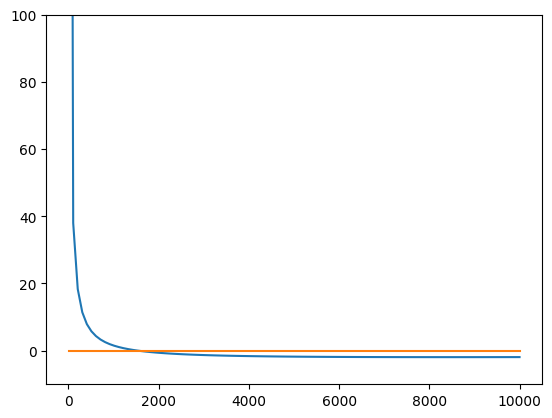

In [16]:
from matplotlib import pyplot as plt
import numpy as np

params = {p:8.3e-5, h:135, w:32, j:100, f:.25, Ae:47, Ap:314, u:1,
                a:1e-5, b:1, d:.002, n:0.1, V:523, vmax:8.8e3, Km:2.5}

dM_params = dM.subs(params)
print(dM_params)

dM_func = sy.lambdify((Me, M), dM_params)
M_vals = np.linspace(5, 10000, 100)

plt.plot(M_vals, dM_func(.1, M_vals))
plt.plot(M_vals, np.zeros_like(M_vals))
plt.ylim(-10, 100)
plt.show()